In [1]:
# -*- coding:utf-8 -*-
import sys
from utils.TradingUtils import *
from trader import *
from utils import config
from portfolio_manager import PortfolioManager

Using device: cuda

{'status': 'ok', 'data': [{'id': 10402052, 'type': 'spot', 'subtype': '', 'state': 'working'}]}


In [2]:
CONFIG_PATH = './config/config.json'
if not os.path.exists(CONFIG_PATH):
    print("config file doesn't exist")
    sys.exit(1)
config.init_config(CONFIG_PATH)

init_account(config.account_file)
print(get_accounts())

{'status': 'ok', 'data': [{'id': 10402052, 'type': 'spot', 'subtype': '', 'state': 'working'}]}


In [3]:
portfolio_manager = PortfolioManager()
portfolio_manager.init_assets(assets_config=config.portfolio_config)

Load portfolio successfully


In [4]:
portfolio_manager.init_data(config.train_bar_count, config.data_mode)

/home/kownse/code/git/RLCrypto_fork/portfolio_manager.py:42: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  self.asset_data = default_pre_process(self.original_data).fillna(0)
/usr/local/lib/python3.6/dist-packages/pandas/core/panel.py:1295: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  downcast=downcast, **kwargs)


In [5]:
#portfolio_manager.build_model()

In [6]:
config.model_path = './model_backup/DRL_Torch_078'

In [7]:
portfolio_manager.load_model('./model_backup/DRL_Torch_078')

In [8]:
result = portfolio_manager.back_test()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:151: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  return self.obj._slice(obj, axis=axis, kind=kind)


0 backtest reward 0.7838270770045856 0.00017047130861343751


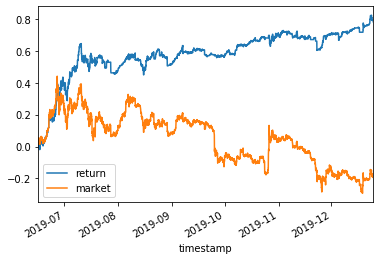

In [9]:
result.plot()